In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
Eps=0.00001

In [16]:
def y1(x):
    return (1-x**4)**0.25
def y2(x):
    return 0.5*(x**2)-x

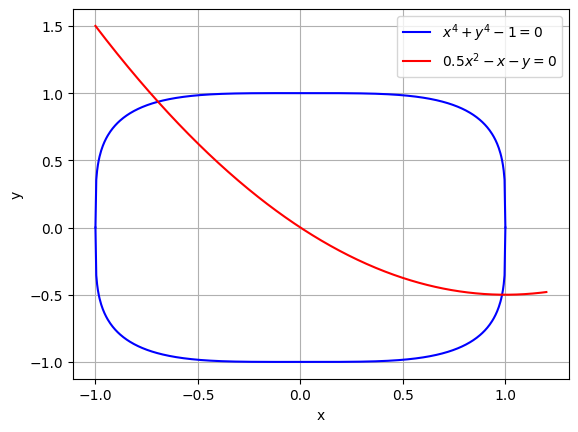

In [17]:
x=np.linspace(-1, 1, 500)
z=np.linspace(-1, 1.2, 500)
plt.figure()
plt.grid()
plt.plot(x, y1(x), color='b', label=r'$x^4+y^4-1=0$')
plt.plot(x, -y1(x), color='b')
plt.plot(z, y2(z),color='r',  label=r'$0.5x^2-x-y=0$')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Метод простой итерации

In [18]:
def fi_1(x, y):
    return (1-y**4)**0.25
def fi_2(x, y):
    return 0.5*x**2-x

In [62]:
data=[]
x, y = 0.85, -0.4
data.append([x, y, fi_1(x, y), fi_2(x, y), '-', '-'])
while len(data)<2 or data[-1][-1]>Eps*(1-0.303) or data[-1][-2]>Eps*(1-0.303):
    x_pred=x
    y_pred=y
    x=fi_1(x, y)
    y=fi_2(x, y)
    data.append([x, y, fi_1(x, y), fi_2(x, y), abs(x-x_pred), abs(y-y_pred)])
    df=pd.DataFrame(data=data, columns=['x_n', 'y_n', 'fi_1(x_n, y_n)', 'fi_2(x_n, y_n)', 'x_n-x_n-1', 'y_n-y_n-1'])
df

,x_n,y_n,"fi_1(x_n, y_n)","fi_2(x_n, y_n)",x_n-x_n-1,y_n-y_n-1
0,0.850000,-0.400000,0.993538,-0.488750,-,-
1,0.993538,-0.499979,0.983998,-0.499979,0.143538,0.099979
2,0.983998,-0.499872,0.984012,-0.499872,0.00954,0.000107
3,0.984012,-0.499872,0.984012,-0.499872,0.000014,0.0
4,0.984012,-0.499872,0.984012,-0.499872,0.0,0.0


Метод Ньютона

In [22]:
def f1(x, y):
    return x**4+y**4-1
def f2(x, y):
    return 0.5*x**2-x-y

In [70]:
fi_2(0.980412, 0)

-0.499808155128

In [66]:
data=[]
x, y = 0.85, -0.4
data.append([x, y, f1(x, y), f2(x, y), '-', '-'])
while len(data)<2 or data[-1][2]>Eps or data[-1][3]>Eps:
    x_pred=x
    y_pred=y
    x=x-(pow(x, 4)+pow(y, 4)-1+4*pow(y, 3)*(0.5*x*x-x-y)) / (4*pow(x, 3)+(x-1)*4*pow(y, 3))
    y=y-((x-1)*(pow(x, 4)+pow(y, 4)-1)-4*pow(x, 3)*(0.5*x*x-x-y)) / (4*pow(x, 3)+(x-1)*4*pow(y, 3))
    data.append([x, y, f1(x, y), f2(x, y), abs(x-x_pred), abs(y-y_pred)])
    df=pd.DataFrame(data=data, columns=['x_n', 'y_n', 'f_1(x_n, y_n)', 'f_2(x_n, y_n)', 'x_n-x_n-1', 'y_n-y_n-1'])
df

,x_n,y_n,"f_1(x_n, y_n)","f_2(x_n, y_n)",x_n-x_n-1,y_n-y_n-1
0,0.850000,-0.400000,-4.523938e-01,-8.875000e-02,-,-
1,1.022221,-0.500498,1.546394e-01,7.448388e-04,0.172221,0.100498
2,0.986021,-0.499874,7.681696e-03,-2.800210e-05,0.0362,0.000624
3,0.984017,-0.499872,2.232901e-05,-9.363685e-08,0.002003,0.000002
4,0.984012,-0.499872,1.904410e-10,-7.989165e-13,0.000006,0.0


Метод наискорейшего спуска

In [54]:
def dF_dx(x, y):
    return 8*pow(x, 3)*(x**4+y**4-1)+2*(x-1)*(0.5*x*x-x-y)
def dF_dy(x, y):
    return 8*pow(y, 3)*(x**4+y**4-1)-2*(0.5*x*x-x-y)

In [65]:
data=[]
x, y = 0.85, -0.4
data.append([x, y, f1(x, y), f2(x, y), '-', '-'])
while  abs(data[-1][2])>Eps or abs(data[-1][3])>Eps:
    x_pred=x
    y_pred=y
    lam_k=(f1(x, y)**2 + f2(x, y)**2) / (dF_dx(x, y)**2 + dF_dy(x, y)**2)
    x=x-lam_k*dF_dx(x, y)
    y=y-lam_k*dF_dy(x, y)
    data.append([x, y, f1(x, y), f2(x, y), abs(x-x_pred), abs(y-y_pred)])
    df=pd.DataFrame(data=data, columns=['x_n', 'y_n', 'f_1(x_n, y_n)', 'f_2(x_n, y_n)', 'x_n-x_n-1', 'y_n-y_n-1'])
df

,x_n,y_n,"f_1(x_n, y_n)","f_2(x_n, y_n)",x_n-x_n-1,y_n-y_n-1
0,0.850000,-0.400000,-4.523938e-01,-0.088750,-,-
1,0.943538,-0.412349,-1.785211e-01,-0.086057,0.093538,0.012349
2,0.974902,-0.417955,-6.615960e-02,-0.081730,0.031365,0.005606
3,0.994290,-0.424312,9.769232e-03,-0.075672,0.019388,0.006357
4,0.977643,-0.463721,-4.023156e-02,-0.036029,0.016647,0.039409
5,0.986340,-0.465994,-6.378294e-03,-0.033913,0.008696,0.002273
6,0.993831,-0.473728,2.591693e-02,-0.026253,0.007492,0.007735
7,0.987301,-0.475392,1.239186e-03,-0.024527,0.00653,0.001664
8,0.984754,-0.489507,-2.187932e-03,-0.010377,0.002547,0.014115
9,0.987091,-0.491569,7.745479e-03,-0.008348,0.002337,0.002062
